In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Get the number of attributes (columns) and records (rows)
num_attributes = df.shape[1]
num_records = df.shape[0]

print('Number of attributes:', num_attributes)
print('Number of records:', num_records)


# Show statistics of the dataset
statistics = df.describe(include='all')
print(statistics)

missing_values = df.isnull().sum()
print('Missing values:', missing_values)

# Check for duplicates
num_duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')


Number of attributes: 35
Number of records: 1470
                Age Attrition BusinessTravel    DailyRate  \
count   1470.000000      1470           1470  1470.000000   
unique          NaN         2              3          NaN   
top             NaN        No  Travel_Rarely          NaN   
freq            NaN      1233           1043          NaN   
mean      36.923810       NaN            NaN   802.485714   
std        9.135373       NaN            NaN   403.509100   
min       18.000000       NaN            NaN   102.000000   
25%       30.000000       NaN            NaN   465.000000   
50%       36.000000       NaN            NaN   802.000000   
75%       43.000000       NaN            NaN  1157.000000   
max       60.000000       NaN            NaN  1499.000000   

                    Department  DistanceFromHome    Education EducationField  \
count                     1470       1470.000000  1470.000000           1470   
unique                       3               NaN          

In [42]:
# Replace missing values with column-wise mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Display the number of missing values after imputation
print("\nMissing values after imputation:")
print(df.isnull().sum())

# Remove duplicate rows
df = df.drop_duplicates()

# Display the number of duplicate rows after removing
num_duplicates_after = df.duplicated().sum()
print(f'Number of duplicate rows after removing: {num_duplicates_after}')

# Drop rows where 'Attrition' column has missing values
df = df.dropna(subset=['Attrition'])

# Display the number of missing values in the 'Attrition' column after removal
missing_attrition_after = df['Attrition'].isnull().sum()
print(f'Number of missing values in Attrition column after removal: {missing_attrition_after}')


Missing values after imputation:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsI

In [43]:
#Define the target column
target_column = 'Attrition'

# Create the Features (input variables) and Labels (target variable)
X = df.drop(columns=[target_column])  # Features: all columns except the target column
y = df[target_column]                 # Labels: the target column

# Display the shapes of the Features and Labels
print(f'Shape of Features (X): {X.shape}')
print(f'Shape of Labels (y): {y.shape}')

Shape of Features (X): (1470, 34)
Shape of Labels (y): (1470,)


In [44]:
# Display non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {list(non_numeric_columns)}")

# Convert binary categorical columns using Label Encoding (e.g., 'Attrition')
binary_columns = ['Attrition']  # You can add other binary columns if needed

label_encoder = LabelEncoder()
for col in binary_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Perform one-hot encoding for non-binary categorical columns
df = pd.get_dummies(df, drop_first=True)

# Display the first few rows of the transformed dataset
print(df.head())

Non-numeric columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
   Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0   41          1       1102                 1          2              1   
1   49          0        279                 8          1              1   
2   37          1       1373                 2          2              1   
3   33          0       1392                 3          4              1   
4   27          0        591                 2          1              1   

   EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  ...  \
0               1                        2          94               3  ...   
1               2                        3          61               2  ...   
2               4                        4          92               2  ...   
3               5                        4          56               3  ...   
4  

In [45]:
# Separate the target column and the one-hot encoded columns
target_column = 'Attrition'

# List of binary and one-hot encoded columns
binary_and_one_hot_columns = ['Gender', 'Over18', 'OverTime', 'BusinessTravel_Travel_Rarely', 
                              'BusinessTravel_Travel_Frequently', 'Department_Human Resources', 
                              'Department_Research & Development', 'EducationField_Human Resources', 
                              'JobRole_Sales Executive', 'MaritalStatus_Single']  # Add other one-hot columns

# List of numeric columns to scale
numeric_columns = [col for col in df.columns if col not in binary_and_one_hot_columns and col != target_column]

# Function to scale data
def scale_data(df, scaling_type='standard'):
    """This function scales the numeric columns based on the selected scaling type: 'standard' or 'minmax'"""
    
    if scaling_type == 'standard':
        scaler = StandardScaler()
    elif scaling_type == 'minmax':
        scaler = MinMaxScaler()
    else:
        raise ValueError("scaling_type must be either 'standard' or 'minmax'")
    
    # Scale the numeric columns
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    
    return df

# Test the function with both scaling types
# Perform Standard Scaling
df_standard_scaled = scale_data(df.copy(), scaling_type='standard')
print("First few rows with Standard Scaling:")
print(df_standard_scaled.head())

# Perform Min-Max Scaling
df_minmax_scaled = scale_data(df.copy(), scaling_type='minmax')
print("\nFirst few rows with Min-Max Scaling:")
print(df_minmax_scaled.head())

First few rows with Standard Scaling:
        Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0  0.446350          1   0.742527         -1.010909  -0.891688            0.0   
1  1.322365          0  -1.297775         -0.147150  -1.868426            0.0   
2  0.008343          1   1.414363         -0.887515  -0.891688            0.0   
3 -0.429664          0   1.461466         -0.764121   1.061787            0.0   
4 -1.086676          0  -0.524295         -0.887515  -1.868426            0.0   

   EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  ...  \
0       -1.701283                -0.660531    1.383138        0.379672  ...   
1       -1.699621                 0.254625   -0.240677       -1.026167  ...   
2       -1.696298                 1.169781    1.284725       -1.026167  ...   
3       -1.694636                 1.169781   -0.486709        0.379672  ...   
4       -1.691313                -1.575686   -1.274014        0.379672  ...   



Correlation of each variable with the target (Attrition):
Attrition                            1.000000
OverTime_Yes                         0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel_Travel_Frequently     0.115143
JobRole_Laboratory Technician        0.098290
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
JobRole_Human Resources              0.036215
Gender_Male                          0.029453
JobRole_Sales Executive              0.019774
MonthlyRate                          0.015170
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.000360
HourlyRate                          -0.006846
EmployeeNumber                      -0.010577
PercentSalaryHike                   -0.013478
EducationField_Other  

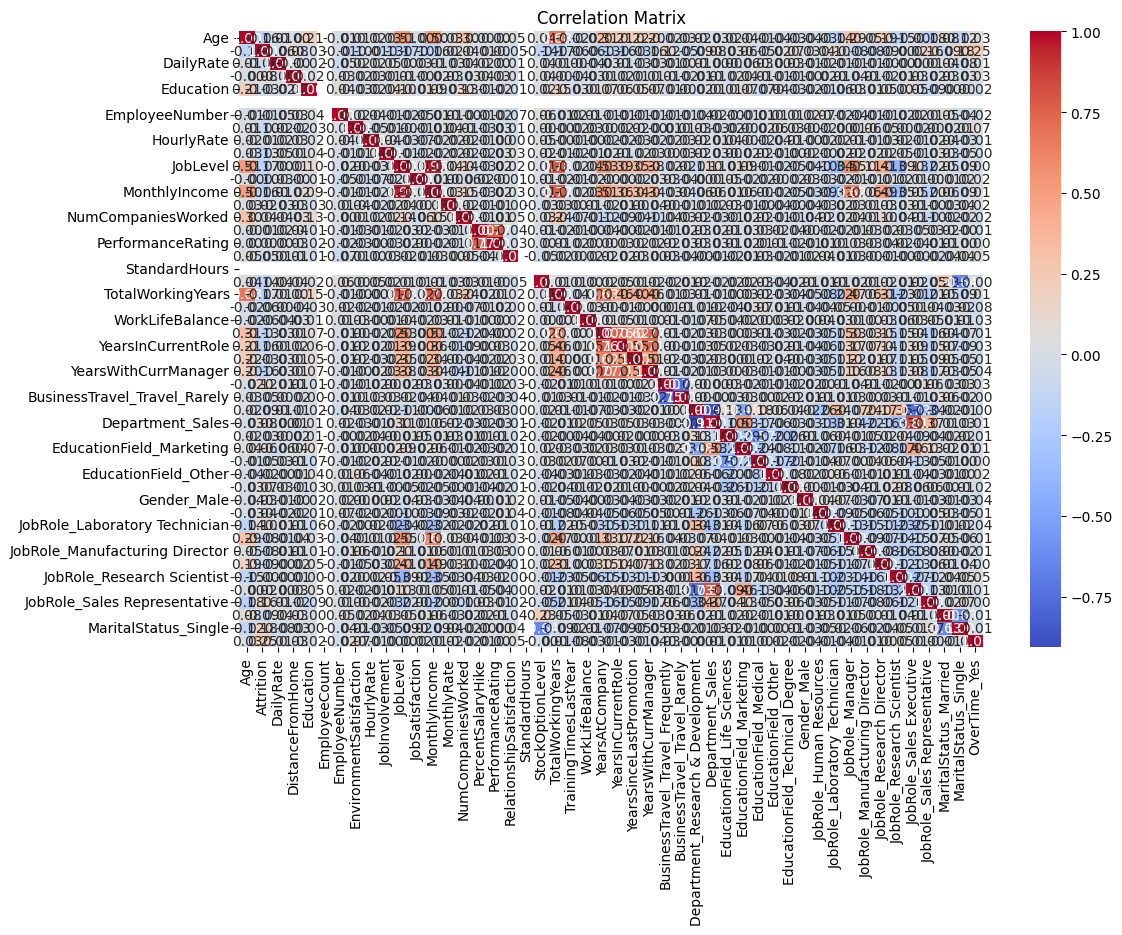


Top 20 features with the highest correlation with Attrition: ['OverTime_Yes', 'MaritalStatus_Single', 'JobRole_Sales Representative', 'BusinessTravel_Travel_Frequently', 'JobRole_Laboratory Technician', 'Department_Sales', 'DistanceFromHome', 'EducationField_Technical Degree', 'EducationField_Marketing', 'NumCompaniesWorked', 'JobRole_Human Resources', 'Gender_Male', 'JobRole_Sales Executive', 'MonthlyRate', 'PerformanceRating', 'JobRole_Research Scientist', 'HourlyRate', 'EmployeeNumber', 'PercentSalaryHike', 'EducationField_Other']


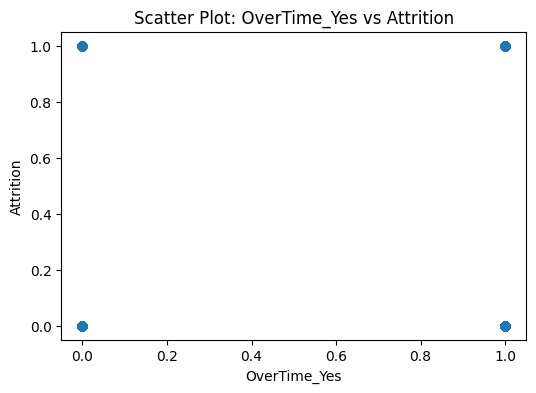

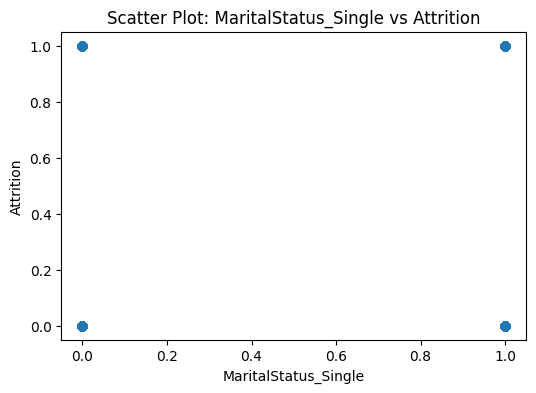

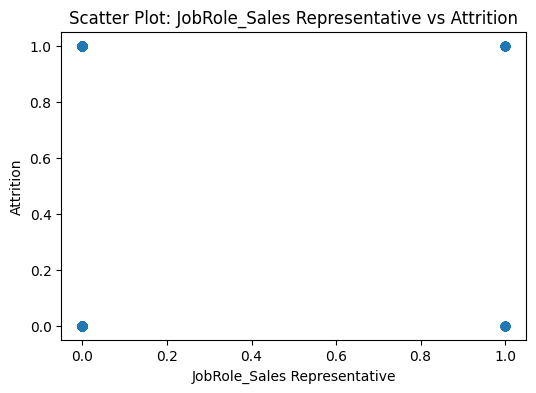

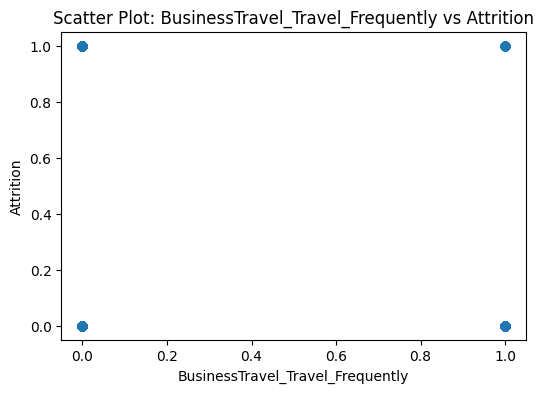

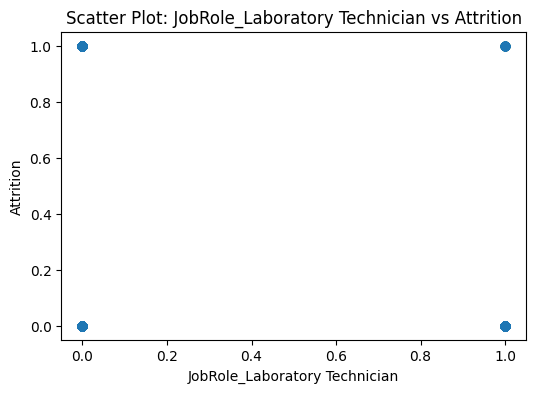

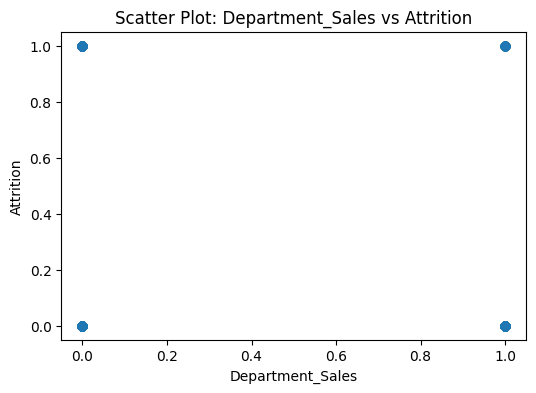

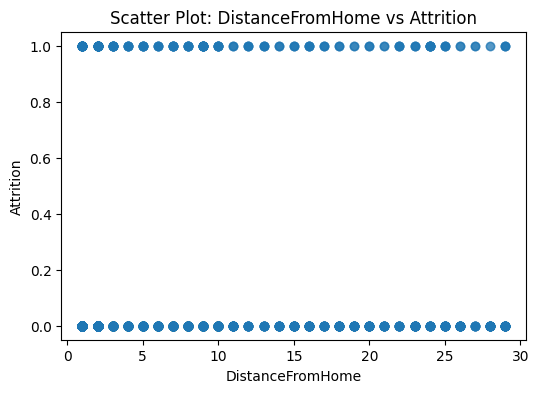

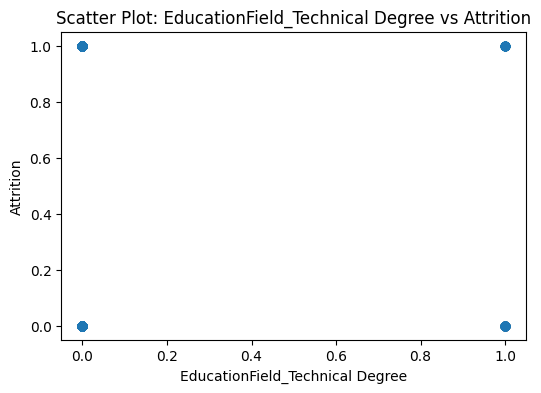

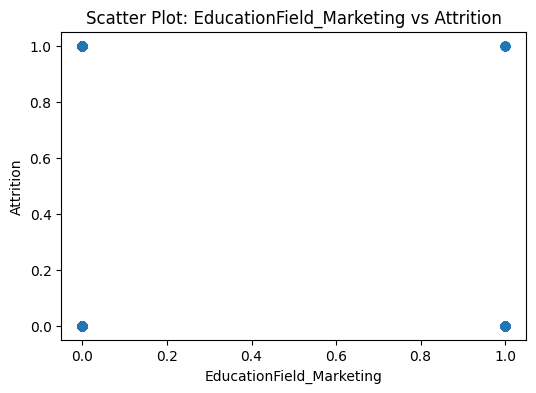

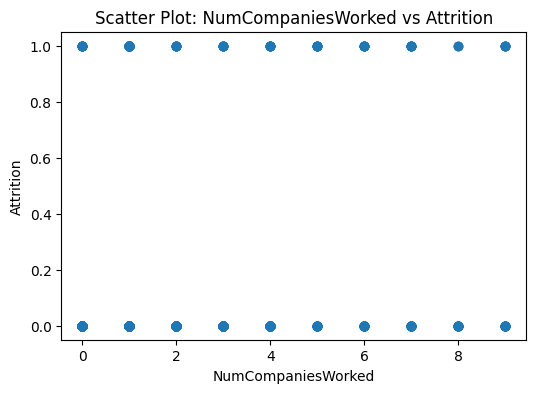

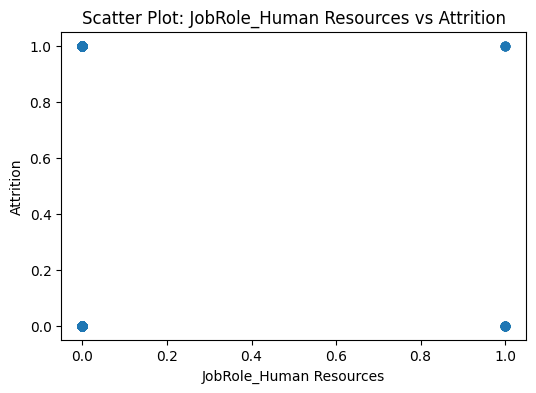

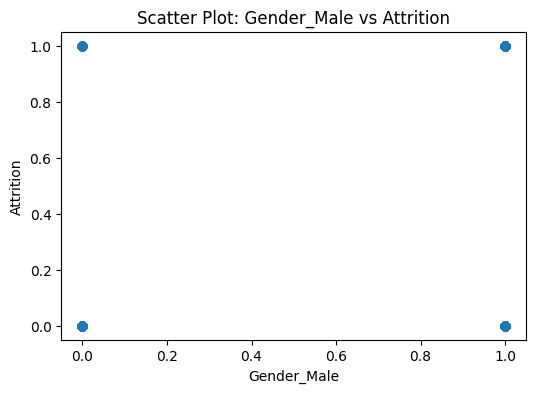

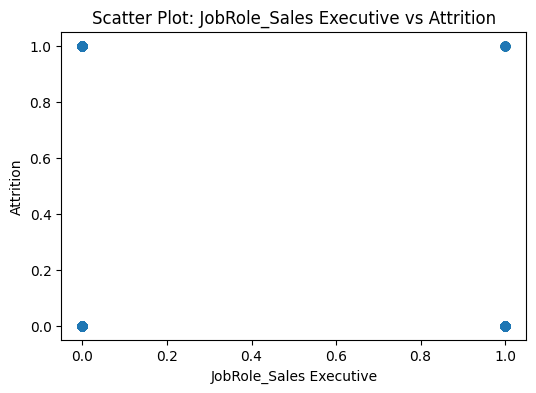

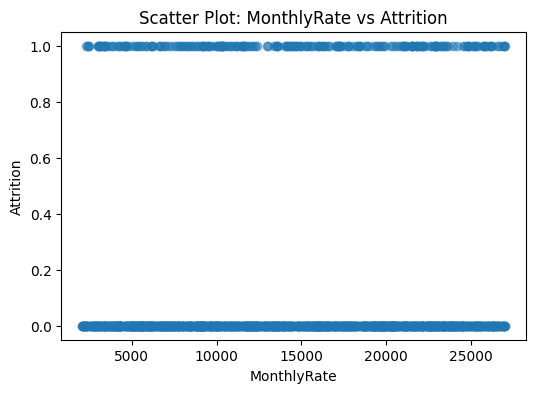

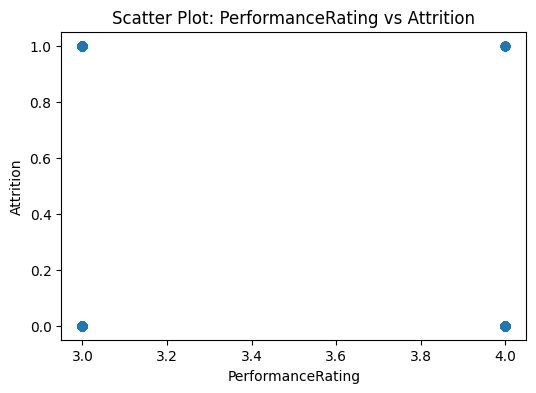

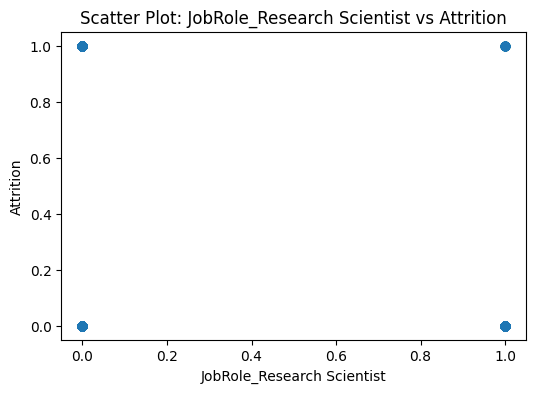

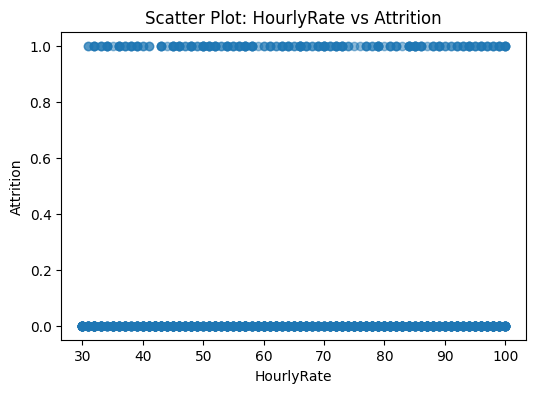

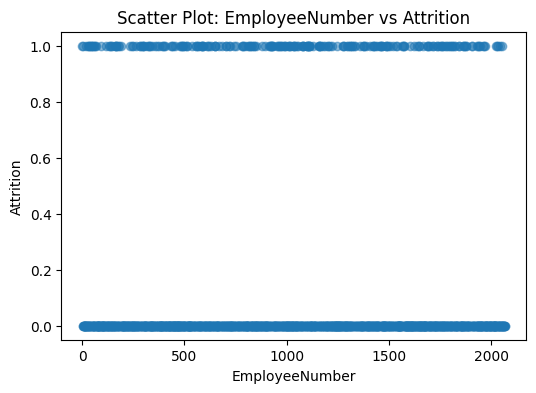

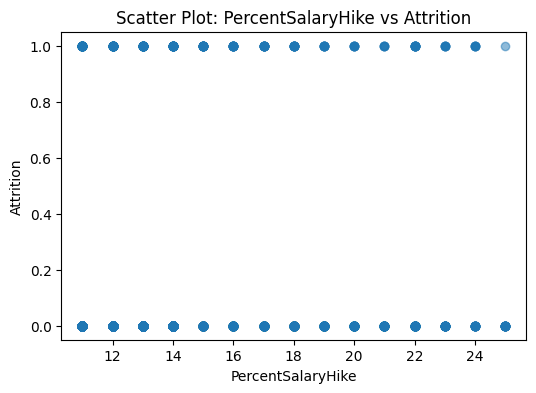

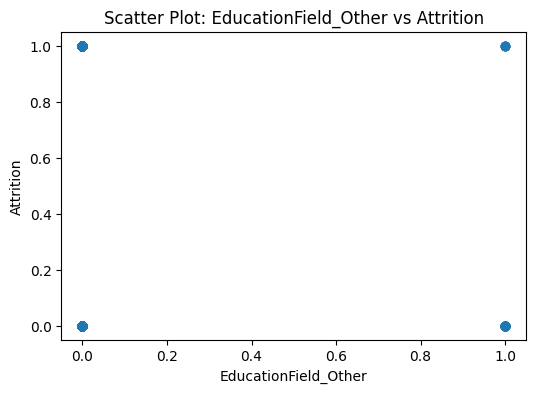

In [46]:
# Perform correlation analysis
correlation_matrix = df.corr()

# Show correlation with the target variable ('Attrition')
correlation_with_target = correlation_matrix['Attrition'].sort_values(ascending=False)
print("Correlation of each variable with the target (Attrition):")
print(correlation_with_target)

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Select the top 20 features with the highest correlation with the target
top_20_features = correlation_with_target.index[1:21]  # Exclude 'Attrition' itself
print(f"\nTop 20 features with the highest correlation with Attrition: {list(top_20_features)}")

# 1D Scatter Plots for top 20 features
for feature in top_20_features:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[feature], df['Attrition'], alpha=0.5)
    plt.title(f'Scatter Plot: {feature} vs Attrition')
    plt.xlabel(feature)
    plt.ylabel('Attrition')
    plt.show()

In [47]:
# Select the top 20 features identified in the previous step
top_20_features = [
    'Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 
    'JobSatisfaction', 'WorkLifeBalance', 'YearsInCurrentRole', 
    'DistanceFromHome', 'PercentSalaryHike', 'YearsSinceLastPromotion',
    'OverTime', 'NumCompaniesWorked', 'StockOptionLevel',
    'JobLevel', 'JobInvolvement', 'EnvironmentSatisfaction',
    'Education', 'RelationshipSatisfaction', 'PerformanceRating',
    'BusinessTravel_Travel_Frequently'
]

# Prepare the features (X) and target (y)
X = df[top_20_features]
y = df['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize two classifiers: Logistic Regression and Random Forest
log_reg = LogisticRegression()
rf_classifier = RandomForestClassifier()

# Train both models
log_reg.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
log_reg_predictions = log_reg.predict(X_test)
rf_predictions = rf_classifier.predict(X_test)

# Evaluate both models
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Print the accuracy for both models
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

# Print classification report for Random Forest (for better understanding)
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, rf_predictions))

KeyError: "['OverTime'] not in index"